In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import cv2
import random


In [ ]:
# # Analyze the color distribution of the images
# color_distributions = {'red': [], 'green': [], 'blue': []}

# for img_file in image_files:
#     img = Image.open(os.path.join(image_folder_path, img_file))
#     img_array = np.array(img)
    
#     # Calculate the mean color values for each channel
#     mean_red = np.mean(img_array[:, :, 0])
#     mean_green = np.mean(img_array[:, :, 1])
#     mean_blue = np.mean(img_array[:, :, 2])
    
#     color_distributions['red'].append(mean_red)
#     color_distributions['green'].append(mean_green)
#     color_distributions['blue'].append(mean_blue)

# # Convert to numpy arrays for easier analysis
# color_distributions['red'] = np.array(color_distributions['red'])
# color_distributions['green'] = np.array(color_distributions['green'])
# color_distributions['blue'] = np.array(color_distributions['blue'])

# # Plot the distribution of color values
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# plt.hist(color_distributions['red'], bins=20, color='red', alpha=0.7)
# plt.title('Distribution of Red Channel Values')
# plt.xlabel('Mean Red Value')
# plt.ylabel('Frequency')

# plt.subplot(1, 3, 2)
# plt.hist(color_distributions['green'], bins=20, color='green', alpha=0.7)
# plt.title('Distribution of Green Channel Values')
# plt.xlabel('Mean Green Value')
# plt.ylabel('Frequency')

# plt.subplot(1, 3, 3)
# plt.hist(color_distributions['blue'], bins=20, color='blue', alpha=0.7)
# plt.title('Distribution of Blue Channel Values')
# plt.xlabel('Mean Blue Value')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

# # maeke the color_distributions data in one plot
# plt.figure(figsize=(18, 6))
# sns.kdeplot(color_distributions['red'], color='red', label='Red Channel', shade=True)
# sns.kdeplot(color_distributions['green'], color='green', label='Green Channel', shade=True)
# sns.kdeplot(color_distributions['blue'], color='blue', label='Blue Channel', shade=True)
# plt.title('Distribution of Color Channel Values')
# plt.xlabel('Mean Color Value')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

In [3]:
df = pd.read_csv('train.csv')
df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,default,round,printed,default,short sleeves,NaN,NaN,NaN,NaN,NaN
1,1,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
2,2,Men Tshirts,5,default,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
3,3,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
4,4,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70208,70374,Women Tops & Tunics,10,multicolor,fitted,regular,square neck,casual,printed,default,short sleeves,regular sleeves,ruffles
70209,70375,Women Tops & Tunics,10,yellow,regular,crop,round neck,casual,default,default,short sleeves,regular sleeves,knitted
70210,70376,Women Tops & Tunics,10,maroon,fitted,crop,round neck,casual,solid,solid,short sleeves,regular sleeves,knitted
70211,70377,Women Tops & Tunics,10,NaN,NaN,NaN,high,NaN,NaN,NaN,short sleeves,NaN,NaN


In [6]:
df['Category'].unique()

array(['Men Tshirts', 'Sarees', 'Kurtis', 'Women Tshirts',
       'Women Tops & Tunics'], dtype=object)

Finished processing category: Men Tshirts
Finished processing category: Sarees
Finished processing category: Kurtis
Finished processing category: Women Tshirts
Finished processing category: Women Tops & Tunics


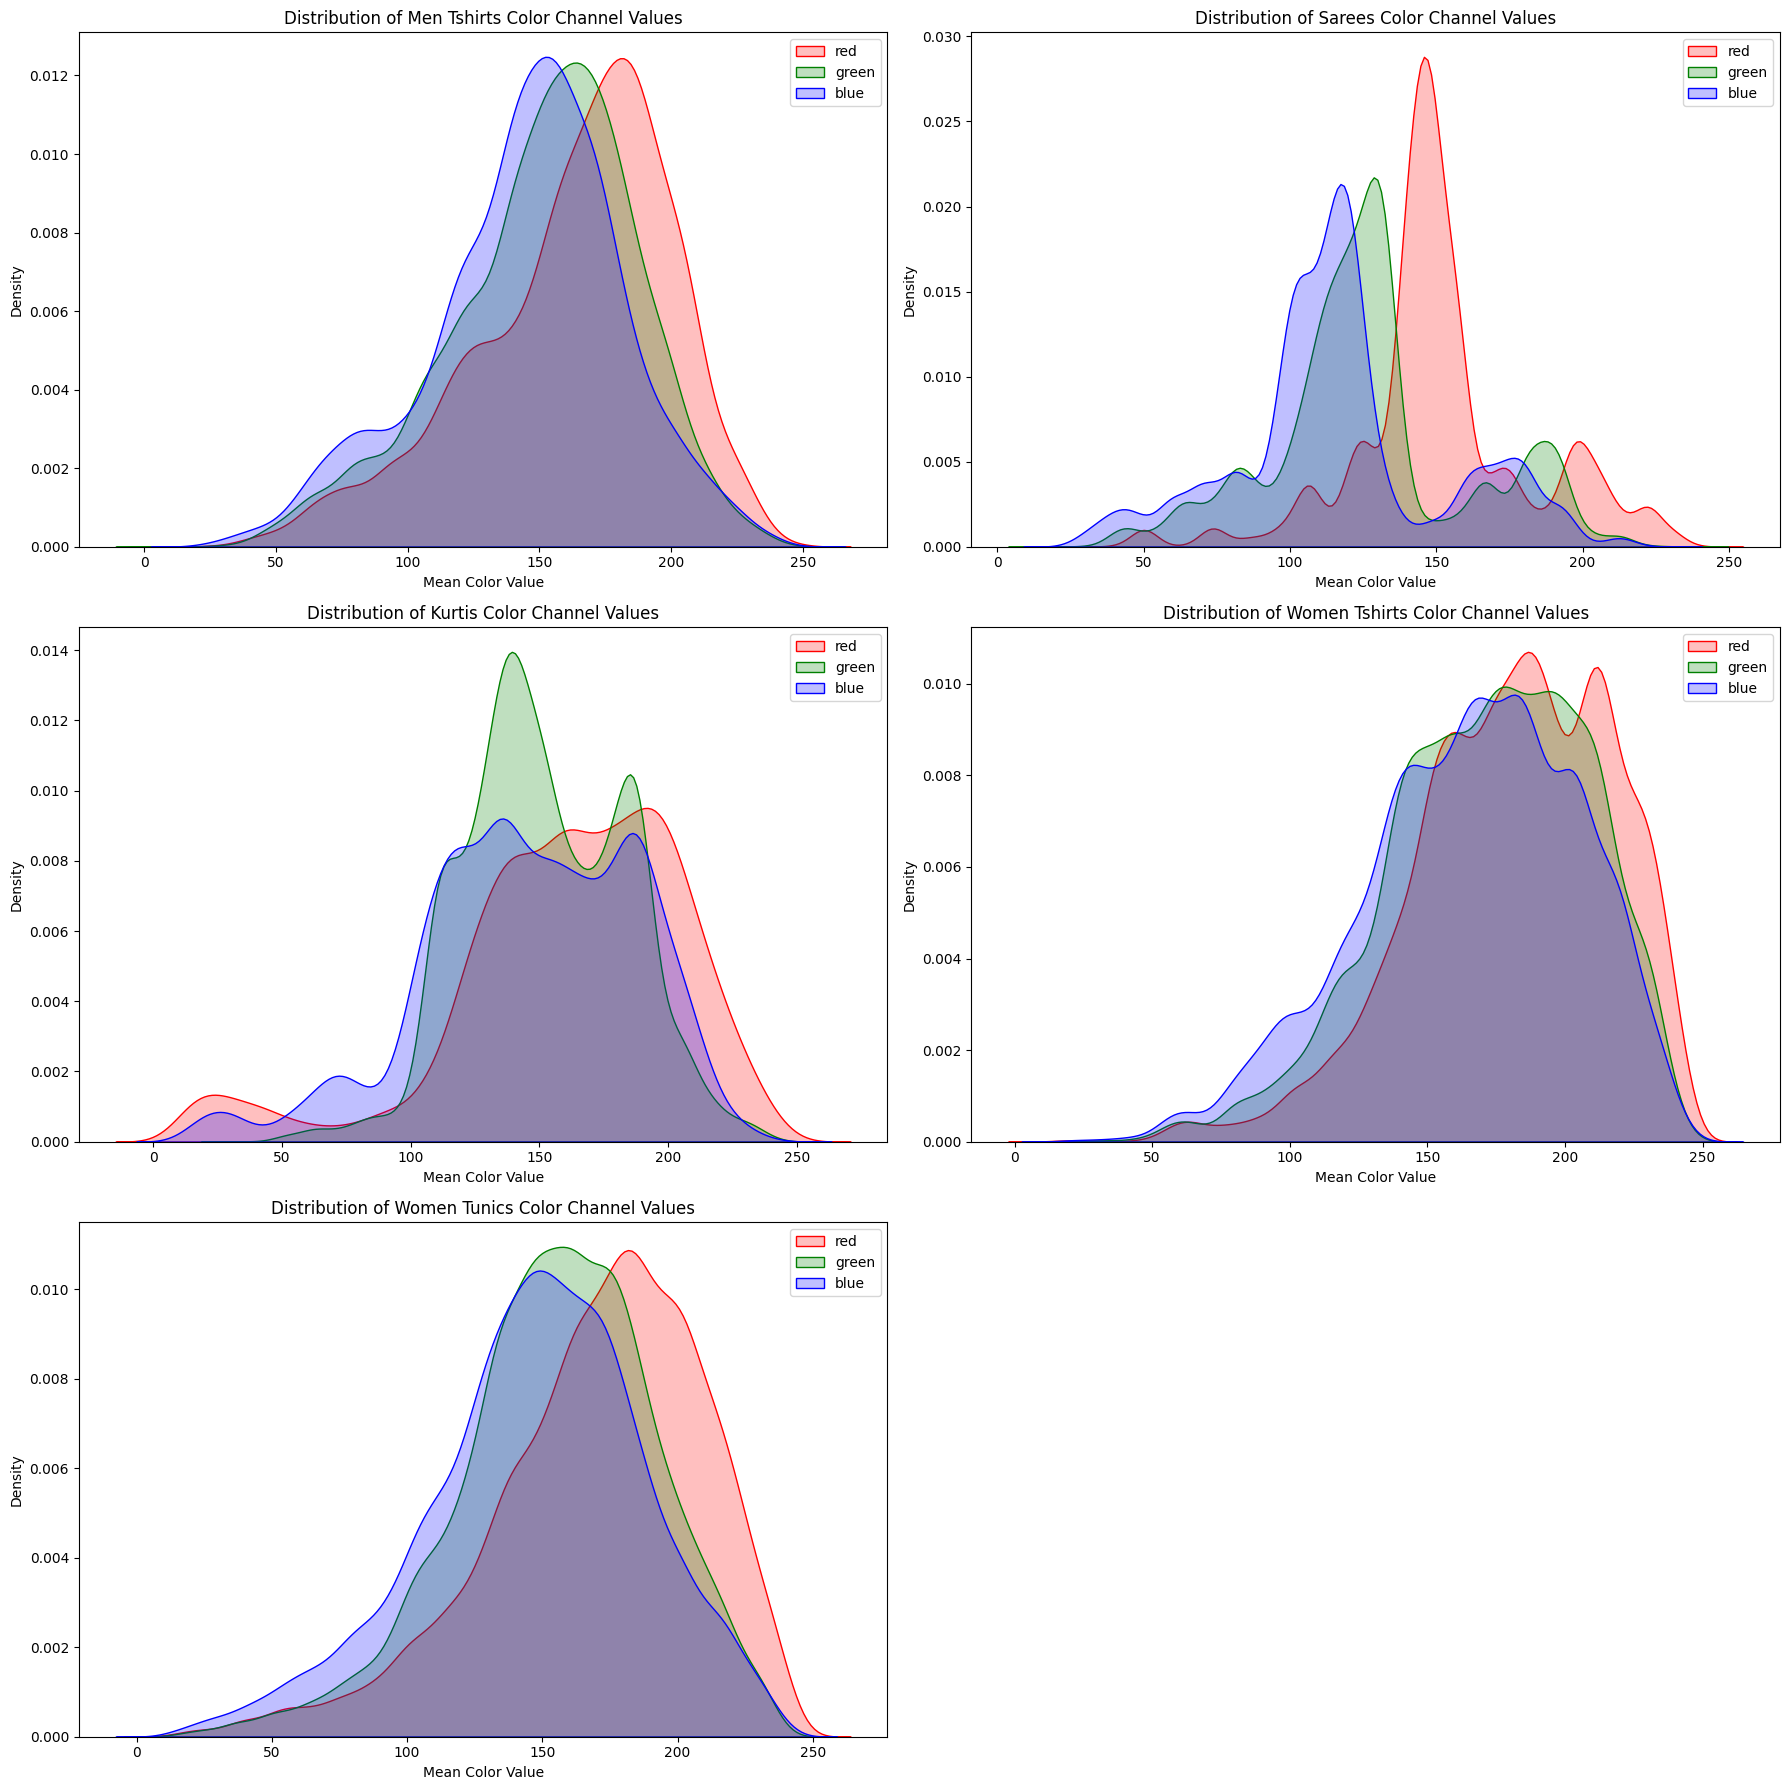

In [14]:
from PIL import Image
import pickle as pkl

images_path = 'train_images'

categories = df['Category'].unique()
df_new = []

for category in categories:
    df_category = df[df['Category'] == category]
    for id in df_category['id']:
        id = str(id)
        # pad the id with 5 zeroes in front
        id = id.zfill(6)
        img = Image.open(os.path.join(images_path, id + '.jpg'))
        img_array = np.array(img)

        mean_red = np.mean(img_array[:, :, 0])
        mean_green = np.mean(img_array[:, :, 1])
        mean_blue = np.mean(img_array[:, :, 2])

        df_new.append({'id': id, 'category': category, 'mean_red': mean_red, 'mean_green': mean_green, 'mean_blue': mean_blue})
    
    print(f'Finished processing category: {category}')

df_new = pd.DataFrame(df_new)

# Plot the distribution of color values for each category
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
sns.kdeplot(df_new[df_new['category'] == 'Men Tshirts']['mean_red'], color='red', label='red', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Men Tshirts']['mean_green'], color='green', label='green', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Men Tshirts']['mean_blue'], color='blue', label='blue', fill=True)
plt.title('Distribution of Men Tshirts Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 2)
sns.kdeplot(df_new[df_new['category'] == 'Sarees']['mean_red'], color='red', label='red', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Sarees']['mean_green'], color='green', label='green', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Sarees']['mean_blue'], color='blue', label='blue', fill=True)
plt.title('Distribution of Sarees Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 3)
sns.kdeplot(df_new[df_new['category'] == 'Kurtis']['mean_red'], color='red', label='red', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Kurtis']['mean_green'], color='green', label='green', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Kurtis']['mean_blue'], color='blue', label='blue', fill=True)
plt.title('Distribution of Kurtis Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 4)
sns.kdeplot(df_new[df_new['category'] == 'Women Tshirts']['mean_red'], color='red', label='red', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Women Tshirts']['mean_green'], color='green', label='green', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Women Tshirts']['mean_blue'], color='blue', label='blue', fill=True)
plt.title('Distribution of Women Tshirts Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()

# Women Tops & Tunics
plt.subplot(3, 2, 5)
sns.kdeplot(df_new[df_new['category'] == 'Women Tops & Tunics']['mean_red'], color='red', label='red', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Women Tops & Tunics']['mean_green'], color='green', label='green', fill=True)
sns.kdeplot(df_new[df_new['category'] == 'Women Tops & Tunics']['mean_blue'], color='blue', label='blue', fill=True)
plt.title('Distribution of Women Tunics Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

pkl.dump(df_new, open('color_distributions.pkl', 'wb'))

In [25]:
df_new

,id,category,mean_red,mean_green,mean_blue
0,000000,Men Tshirts,151.736825,74.237186,45.108345
1,000001,Men Tshirts,189.042352,187.939582,153.815764
2,000002,Men Tshirts,169.558532,166.314833,166.229472
3,000003,Men Tshirts,195.912222,152.273206,139.834195
4,000004,Men Tshirts,194.488826,188.599023,172.904744
...,...,...,...,...,...
70208,070374,Women Tops & Tunics,103.220334,142.398667,152.426758
70209,070375,Women Tops & Tunics,139.768141,128.842025,121.071148
70210,070376,Women Tops & Tunics,158.964718,132.261363,136.619481
70211,070377,Women Tops & Tunics,38.250476,101.053571,106.433459


In [26]:
# group by category and calculate the mean and variance of the color values
df_grouped = df_new.groupby('category').agg({'mean_red': ['mean', 'var'], 'mean_green': ['mean', 'var'], 'mean_blue': ['mean', 'var']})
df_grouped.columns = ['red_mean', 'red_var', 'green_mean', 'green_var', 'blue_mean', 'blue_var']
df_grouped = df_grouped.reset_index()
df_grouped

,category,red_mean,red_var,green_mean,green_var,blue_mean,blue_var
0,Kurtis,160.655818,2133.547477,152.009907,953.420316,146.182458,1734.136633
1,Men Tshirts,162.835186,1442.192834,151.318995,1291.591870,144.689760,1379.218190
2,Sarees,151.855798,965.539192,126.519805,1164.022834,116.549389,1282.804031
3,Women Tops & Tunics,170.198021,1607.613121,154.865517,1363.913389,147.020190,1658.464265
4,Women Tshirts,181.149717,1302.614434,171.628568,1344.056059,165.273797,1540.857355


In [34]:
from scipy.stats import kruskal

# Extract the color channel means for each category
red_means = [df_new[df_new['category'] == category]['mean_red'] for category in categories]
green_means = [df_new[df_new['category'] == category]['mean_green'] for category in categories]
blue_means = [df_new[df_new['category'] == category]['mean_blue'] for category in categories]

# Perform Kruskal-Wallis H-test
stat_red, p_red = kruskal(*red_means)
stat_green, p_green = kruskal(*green_means)
stat_blue, p_blue = kruskal(*blue_means)

# Print the results
print(f"Kruskal-Wallis H-test results for red values: H-statistic = {stat_red}, p-value = {p_red}")
print(f"Kruskal-Wallis H-test results for green values: H-statistic = {stat_green}, p-value = {p_green}")
print(f"Kruskal-Wallis H-test results for blue values: H-statistic = {stat_blue}, p-value = {p_blue}")

# Set the significance level
significance_level = 0.05

# Check if the p-values are less than the significance level
if p_red < significance_level:
    print("The red color distributions are significantly different across categories.")
else:
    print("The red color distributions are not significantly different across categories.")

if p_green < significance_level:
    print("The green color distributions are significantly different across categories.")
else:
    print("The green color distributions are not significantly different across categories.")

if p_blue < significance_level:
    print("The blue color distributions are significantly different across categories.")
else:
    print("The blue color distributions are not significantly different across categories.")

if p_red < significance_level or p_green < significance_level or p_blue < significance_level:
    print("\n ---------------------------------------------------- \n")
    print("At least one of the color channels has significantly different distributions across categories.")
    print("Rejection of the null hypothesis: The color distributions are not the same across categories.")
    print("We can use the color distributions as features for classification.")
else:
    print("The color distributions are not significantly different across categories.")
    print("We cannot use the color distributions as features for classification.")

Kruskal-Wallis H-test results for red values: H-statistic = 7241.353359852603, p-value = 0.0
Kruskal-Wallis H-test results for green values: H-statistic = 13353.422911708638, p-value = 0.0
Kruskal-Wallis H-test results for blue values: H-statistic = 13112.62089601969, p-value = 0.0
The red color distributions are significantly different across categories.
The green color distributions are significantly different across categories.
The blue color distributions are significantly different across categories.

 ---------------------------------------------------- 

At least one of the color channels has significantly different distributions across categories.
Rejection of the null hypothesis: The color distributions are not the same across categories.
We can use the color distributions as features for classification.


In [31]:
from statsmodels.multivariate.manova import MANOVA

# Prepare the data for MANOVA
manova_data = df_grouped[['red_mean', 'green_mean', 'blue_mean']]
manova_data['category'] = df_grouped['category']

# Perform MANOVA
manova = MANOVA.from_formula('red_mean + green_mean + blue_mean ~ category', data=manova_data)
manova_results = manova.mv_test()

# Print the results
print(manova_results)

# Extract the p-values
p_values = manova_results.results['category']['stat'].values[0]

# Print the p-values
print(f"P-values from MANOVA: {p_values}")

# Set the significance level
significance_level = 0.05

# Check if the p-values are less than the significance level
#H0 = values are not 
if all(p_values < significance_level):
    print("The color distributions are significantly different across categories.")
else:
    print("The color distributions are not significantly different across categories.")

                               Multivariate linear model
                                                                                       
-----------------------------------------------------------------------------------------
            Intercept                  Value           Num DF   Den DF   F Value   Pr > F
-----------------------------------------------------------------------------------------
               Wilks' lambda                  0.0000   1.0000   0.0000    0.0000      nan
              Pillai's trace                  1.0000   1.0000   0.0000    0.0000      nan
      Hotelling-Lawley trace   1501199875790164.2500   1.0000   0.0000    0.0000      nan
         Roy's greatest root   1501199875790164.2500   1.0000   0.0000    0.0000      nan
---------------------------------------------------------------------------------------
                                                                                       
-------------------------------------------------

/var/folders/tc/8g6g_hgn5zx4bzcxx9688mhw0000gn/T/ipykernel_7098/1619836148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manova_data['category'] = df_grouped['category']


In [21]:
from scipy.stats import kruskal

# Extract the color channel means and variances for each category
red_means = [df_grouped[df_grouped['category'] == category]['red_mean'].values[0] for category in categories]
green_means = [df_grouped[df_grouped['category'] == category]['green_mean'].values[0] for category in categories]
blue_means = [df_grouped[df_grouped['category'] == category]['blue_mean'].values[0] for category in categories]

red_vars = [df_grouped[df_grouped['category'] == category]['red_var'].values[0] for category in categories]
green_vars = [df_grouped[df_grouped['category'] == category]['green_var'].values[0] for category in categories]
blue_vars = [df_grouped[df_grouped['category'] == category]['blue_var'].values[0] for category in categories]

# Perform Kruskal-Wallis H-test
stat_red_mean, p_red_mean = kruskal(*[df_new[df_new['category'] == category]['mean_red'] for category in categories])
stat_green_mean, p_green_mean = kruskal(*[df_new[df_new['category'] == category]['mean_green'] for category in categories])
stat_blue_mean, p_blue_mean = kruskal(*[df_new[df_new['category'] == category]['mean_blue'] for category in categories])

stat_red_var, p_red_var = kruskal(*[df_new[df_new['category'] == category]['mean_red'].var() for category in categories])
stat_green_var, p_green_var = kruskal(*[df_new[df_new['category'] == category]['mean_green'].var() for category in categories])
stat_blue_var, p_blue_var = kruskal(*[df_new[df_new['category'] == category]['mean_blue'].var() for category in categories])

# Print the results
print(f"Kruskal-Wallis H-test results for mean red values: H-statistic = {stat_red_mean}, p-value = {p_red_mean}")
print(f"Kruskal-Wallis H-test results for mean green values: H-statistic = {stat_green_mean}, p-value = {p_green_mean}")
print(f"Kruskal-Wallis H-test results for mean blue values: H-statistic = {stat_blue_mean}, p-value = {p_blue_mean}")

print(f"Kruskal-Wallis H-test results for red variance values: H-statistic = {stat_red_var}, p-value = {p_red_var}")
print(f"Kruskal-Wallis H-test results for green variance values: H-statistic = {stat_green_var}, p-value = {p_green_var}")
print(f"Kruskal-Wallis H-test results for blue variance values: H-statistic = {stat_blue_var}, p-value = {p_blue_var}")

# Check if the p-values are less than the significance level (0.05)
significance_level = 0.05
print(f"Mean red values depend on category: {p_red_mean < significance_level}")
print(f"Mean green values depend on category: {p_green_mean < significance_level}")
print(f"Mean blue values depend on category: {p_blue_mean < significance_level}")

print(f"Red variance values depend on category: {p_red_var < significance_level}")
print(f"Green variance values depend on category: {p_green_var < significance_level}")
print(f"Blue variance values depend on category: {p_blue_var < significance_level}")

Kruskal-Wallis H-test results for mean red values: H-statistic = 7241.353359852603, p-value = 0.0
Kruskal-Wallis H-test results for mean green values: H-statistic = 13353.422911708638, p-value = 0.0
Kruskal-Wallis H-test results for mean blue values: H-statistic = 13112.62089601969, p-value = 0.0
Kruskal-Wallis H-test results for red variance values: H-statistic = 4.0, p-value = 0.40600584970983794
Kruskal-Wallis H-test results for green variance values: H-statistic = 4.0, p-value = 0.40600584970983794
Kruskal-Wallis H-test results for blue variance values: H-statistic = 4.0, p-value = 0.40600584970983794
Mean red values depend on category: True
Mean green values depend on category: True
Mean blue values depend on category: True
Red variance values depend on category: False
Green variance values depend on category: False
Blue variance values depend on category: False
